In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("./DIB_spreadsheet (CSV).csv")

# set the max columns to none
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,NO OF RESPONDENTS,GENDER,AGE,RELIGION,MARITAL_STATUS,SPOUSE_JOB,SPOUSE_JOB_NATURE,ETHINCITY,NATURE_OF_FAMILY,EDUCATIONAL_QUALIFICATION,MONTHLY_INCOME,PRESENT_POSITION,EXPERIENCE,NATURE_OF_APPOINMENT,HOURS_SPENT_IN_BANK,NO_OF_EMPLOYEES,SATISFACTION,WORK_LIFE_BALANCE,SM1,SM2,SM3,SM4,SM5,SM6,SM7,SM8,SM9,SM10,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,FA10,FA11,FA12,FA13,SI1,SI2,SI3,SI4,SI5,SI6,SI7,SI8,H1,H2,H3,H4,H5,H6,H7,H8,WS1,WS2,WS3,WS4,WS5,WS6,WS7,WS8,WS9,WS10,WS11,WS12,WS13,WS14,WS15,WS16,WS17,WS18,WS19,WS20,WS21,WS22,WS23,WS24,WS25,WS26,WS27,WS28,WS29,PE1,PE2,PE3,PE4,IE1,IE2,IE3,IE4,IE5,IE6,IE7,IE8,IE9,IE10,IE11,IE12,IE13,WLB1,WLB2,WLB3,WLB4,WLB5,WLB6,WLB7,WLB8,WLB9,WLB10,WLB11,WLB12,WLB13
0,1,2,1,1,2,0,0,2,2,3,1,2,2,1,1,10,1,1,2,2,1,1,1,3,5,4,4,2,1,2,4,3,3,3,4,4,3,2,5,4,5,3,3,3,2,3,2,2,5,2,4,1,4,4,1,2,2,5,4,4,3,4,4,3,1,5,3,2,5,4,5,4,3,5,4,4,4,4,5,4,4,4,1,1,2,1,2,2,2,1,2,2,1,1,2,1,1,2,2,2,2,1,1,2,3,3,3,4,4,4,2,4,3,3,3,1
1,2,1,2,1,1,1,2,1,1,3,2,2,3,1,2,10,1,1,2,2,3,1,3,1,1,2,3,2,3,2,3,1,5,2,2,4,2,1,4,1,2,1,2,1,1,3,1,1,2,1,1,1,1,3,4,2,4,5,5,2,5,2,3,5,1,3,2,4,5,2,4,3,3,5,5,4,5,5,5,5,4,5,5,3,5,5,2,1,2,1,2,2,1,1,2,1,1,2,2,1,1,1,1,4,2,4,4,2,3,2,2,4,2,4,4,2
2,3,1,3,1,1,1,1,1,1,4,2,1,4,1,2,10,1,1,4,4,2,3,2,2,2,5,2,5,5,3,5,5,3,5,4,5,5,2,3,1,3,5,4,5,3,5,4,2,5,1,5,2,3,2,3,4,1,5,4,3,2,4,3,2,1,3,5,5,5,5,5,3,2,5,5,5,5,3,5,5,5,4,5,2,3,1,2,2,2,1,1,2,2,1,2,1,1,2,2,2,2,1,1,5,2,2,5,4,3,2,5,2,3,5,4,3
3,4,2,1,1,1,1,2,1,1,5,2,2,3,1,2,10,1,1,3,2,1,3,4,1,1,1,1,1,1,2,1,4,3,2,1,2,2,2,3,1,3,2,3,2,5,5,2,1,2,1,1,1,2,2,2,1,2,1,2,1,1,3,3,3,1,1,2,2,2,4,3,1,1,3,4,3,5,2,2,1,2,5,5,1,5,5,2,2,2,2,2,2,1,2,2,1,1,1,2,2,1,1,1,2,2,2,2,4,4,3,2,3,3,2,2,2
4,5,1,4,1,1,1,3,2,1,4,4,2,4,1,2,10,1,1,3,2,2,1,5,2,1,1,1,2,2,2,5,2,5,2,5,1,5,1,5,3,1,3,3,3,3,5,1,1,1,3,1,1,1,1,1,1,4,4,4,5,3,2,2,2,1,1,3,3,5,5,3,4,4,5,4,4,4,3,5,5,3,4,5,1,5,5,2,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,1,3,1,2,5,4,4,2,3,4,2,4,5,2


In [4]:
df['SPOUSE_JOB'].value_counts()

SPOUSE_JOB
1    230
0    185
2     81
Name: count, dtype: int64

In [5]:
df.isnull().sum()

NO OF RESPONDENTS    0
GENDER               0
AGE                  0
RELIGION             0
MARITAL_STATUS       0
                    ..
WLB9                 0
WLB10                0
WLB11                0
WLB12                0
WLB13                0
Length: 116, dtype: int64

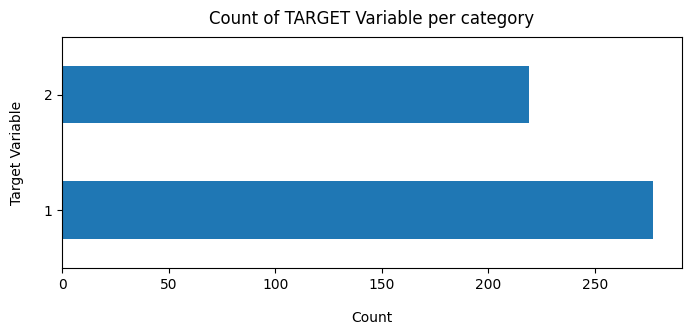

In [6]:
#For classification problems, always have a look at the ratio of the output categories.
df['WORK_LIFE_BALANCE'].value_counts().plot(kind='barh', figsize=(8, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [7]:
#percetage of values in each category
100*df['WORK_LIFE_BALANCE'].value_counts()/len(df['WORK_LIFE_BALANCE'])

WORK_LIFE_BALANCE
1    55.846774
2    44.153226
Name: count, dtype: float64

In [8]:
df_copy = df.copy()

In [9]:
df_copy.head()

,NO OF RESPONDENTS,GENDER,AGE,RELIGION,MARITAL_STATUS,SPOUSE_JOB,SPOUSE_JOB_NATURE,ETHINCITY,NATURE_OF_FAMILY,EDUCATIONAL_QUALIFICATION,MONTHLY_INCOME,PRESENT_POSITION,EXPERIENCE,NATURE_OF_APPOINMENT,HOURS_SPENT_IN_BANK,NO_OF_EMPLOYEES,SATISFACTION,WORK_LIFE_BALANCE,SM1,SM2,SM3,SM4,SM5,SM6,SM7,SM8,SM9,SM10,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,FA10,FA11,FA12,FA13,SI1,SI2,SI3,SI4,SI5,SI6,SI7,SI8,H1,H2,H3,H4,H5,H6,H7,H8,WS1,WS2,WS3,WS4,WS5,WS6,WS7,WS8,WS9,WS10,WS11,WS12,WS13,WS14,WS15,WS16,WS17,WS18,WS19,WS20,WS21,WS22,WS23,WS24,WS25,WS26,WS27,WS28,WS29,PE1,PE2,PE3,PE4,IE1,IE2,IE3,IE4,IE5,IE6,IE7,IE8,IE9,IE10,IE11,IE12,IE13,WLB1,WLB2,WLB3,WLB4,WLB5,WLB6,WLB7,WLB8,WLB9,WLB10,WLB11,WLB12,WLB13
0,1,2,1,1,2,0,0,2,2,3,1,2,2,1,1,10,1,1,2,2,1,1,1,3,5,4,4,2,1,2,4,3,3,3,4,4,3,2,5,4,5,3,3,3,2,3,2,2,5,2,4,1,4,4,1,2,2,5,4,4,3,4,4,3,1,5,3,2,5,4,5,4,3,5,4,4,4,4,5,4,4,4,1,1,2,1,2,2,2,1,2,2,1,1,2,1,1,2,2,2,2,1,1,2,3,3,3,4,4,4,2,4,3,3,3,1
1,2,1,2,1,1,1,2,1,1,3,2,2,3,1,2,10,1,1,2,2,3,1,3,1,1,2,3,2,3,2,3,1,5,2,2,4,2,1,4,1,2,1,2,1,1,3,1,1,2,1,1,1,1,3,4,2,4,5,5,2,5,2,3,5,1,3,2,4,5,2,4,3,3,5,5,4,5,5,5,5,4,5,5,3,5,5,2,1,2,1,2,2,1,1,2,1,1,2,2,1,1,1,1,4,2,4,4,2,3,2,2,4,2,4,4,2
2,3,1,3,1,1,1,1,1,1,4,2,1,4,1,2,10,1,1,4,4,2,3,2,2,2,5,2,5,5,3,5,5,3,5,4,5,5,2,3,1,3,5,4,5,3,5,4,2,5,1,5,2,3,2,3,4,1,5,4,3,2,4,3,2,1,3,5,5,5,5,5,3,2,5,5,5,5,3,5,5,5,4,5,2,3,1,2,2,2,1,1,2,2,1,2,1,1,2,2,2,2,1,1,5,2,2,5,4,3,2,5,2,3,5,4,3
3,4,2,1,1,1,1,2,1,1,5,2,2,3,1,2,10,1,1,3,2,1,3,4,1,1,1,1,1,1,2,1,4,3,2,1,2,2,2,3,1,3,2,3,2,5,5,2,1,2,1,1,1,2,2,2,1,2,1,2,1,1,3,3,3,1,1,2,2,2,4,3,1,1,3,4,3,5,2,2,1,2,5,5,1,5,5,2,2,2,2,2,2,1,2,2,1,1,1,2,2,1,1,1,2,2,2,2,4,4,3,2,3,3,2,2,2
4,5,1,4,1,1,1,3,2,1,4,4,2,4,1,2,10,1,1,3,2,2,1,5,2,1,1,1,2,2,2,5,2,5,2,5,1,5,1,5,3,1,3,3,3,3,5,1,1,1,3,1,1,1,1,1,1,4,4,4,5,3,2,2,2,1,1,3,3,5,5,3,4,4,5,4,4,4,3,5,5,3,4,5,1,5,5,2,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,1,3,1,2,5,4,4,2,3,4,2,4,5,2


In [10]:
df_copy['EXPERIENCE'].value_counts()

EXPERIENCE
3    148
2    127
4    120
1    101
Name: count, dtype: int64

Text(0.5, 1.0, 'Job satisfaction vs experience')

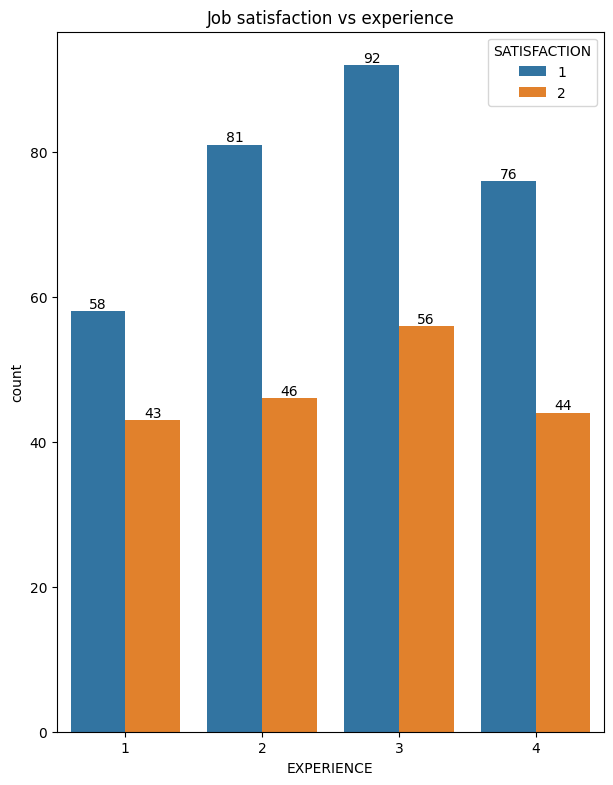

In [11]:
plt.figure(figsize=(24,20))
plt.subplot(231)
ax = sns.countplot(x=df_copy['EXPERIENCE'],hue=df_copy['SATISFACTION'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Job satisfaction vs experience')


Text(0.5, 1.0, 'WORK_LIFE_BALANCE vs SPOUSE_JOB')

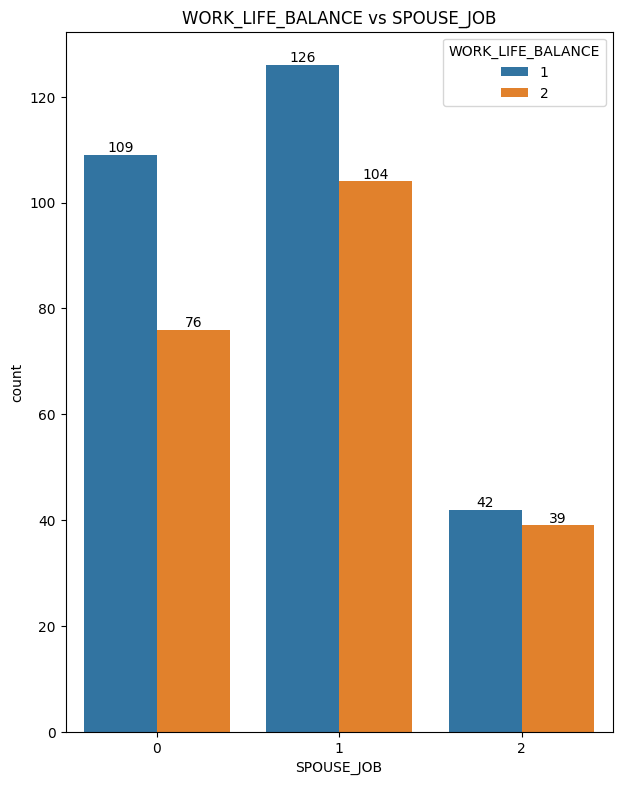

In [12]:
plt.figure(figsize=(24,20))
plt.subplot(231)
ax = sns.countplot(x=df_copy['SPOUSE_JOB'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('WORK_LIFE_BALANCE vs SPOUSE_JOB')


In [13]:
df_copy.head()

,NO OF RESPONDENTS,GENDER,AGE,RELIGION,MARITAL_STATUS,SPOUSE_JOB,SPOUSE_JOB_NATURE,ETHINCITY,NATURE_OF_FAMILY,EDUCATIONAL_QUALIFICATION,MONTHLY_INCOME,PRESENT_POSITION,EXPERIENCE,NATURE_OF_APPOINMENT,HOURS_SPENT_IN_BANK,NO_OF_EMPLOYEES,SATISFACTION,WORK_LIFE_BALANCE,SM1,SM2,SM3,SM4,SM5,SM6,SM7,SM8,SM9,SM10,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,FA10,FA11,FA12,FA13,SI1,SI2,SI3,SI4,SI5,SI6,SI7,SI8,H1,H2,H3,H4,H5,H6,H7,H8,WS1,WS2,WS3,WS4,WS5,WS6,WS7,WS8,WS9,WS10,WS11,WS12,WS13,WS14,WS15,WS16,WS17,WS18,WS19,WS20,WS21,WS22,WS23,WS24,WS25,WS26,WS27,WS28,WS29,PE1,PE2,PE3,PE4,IE1,IE2,IE3,IE4,IE5,IE6,IE7,IE8,IE9,IE10,IE11,IE12,IE13,WLB1,WLB2,WLB3,WLB4,WLB5,WLB6,WLB7,WLB8,WLB9,WLB10,WLB11,WLB12,WLB13
0,1,2,1,1,2,0,0,2,2,3,1,2,2,1,1,10,1,1,2,2,1,1,1,3,5,4,4,2,1,2,4,3,3,3,4,4,3,2,5,4,5,3,3,3,2,3,2,2,5,2,4,1,4,4,1,2,2,5,4,4,3,4,4,3,1,5,3,2,5,4,5,4,3,5,4,4,4,4,5,4,4,4,1,1,2,1,2,2,2,1,2,2,1,1,2,1,1,2,2,2,2,1,1,2,3,3,3,4,4,4,2,4,3,3,3,1
1,2,1,2,1,1,1,2,1,1,3,2,2,3,1,2,10,1,1,2,2,3,1,3,1,1,2,3,2,3,2,3,1,5,2,2,4,2,1,4,1,2,1,2,1,1,3,1,1,2,1,1,1,1,3,4,2,4,5,5,2,5,2,3,5,1,3,2,4,5,2,4,3,3,5,5,4,5,5,5,5,4,5,5,3,5,5,2,1,2,1,2,2,1,1,2,1,1,2,2,1,1,1,1,4,2,4,4,2,3,2,2,4,2,4,4,2
2,3,1,3,1,1,1,1,1,1,4,2,1,4,1,2,10,1,1,4,4,2,3,2,2,2,5,2,5,5,3,5,5,3,5,4,5,5,2,3,1,3,5,4,5,3,5,4,2,5,1,5,2,3,2,3,4,1,5,4,3,2,4,3,2,1,3,5,5,5,5,5,3,2,5,5,5,5,3,5,5,5,4,5,2,3,1,2,2,2,1,1,2,2,1,2,1,1,2,2,2,2,1,1,5,2,2,5,4,3,2,5,2,3,5,4,3
3,4,2,1,1,1,1,2,1,1,5,2,2,3,1,2,10,1,1,3,2,1,3,4,1,1,1,1,1,1,2,1,4,3,2,1,2,2,2,3,1,3,2,3,2,5,5,2,1,2,1,1,1,2,2,2,1,2,1,2,1,1,3,3,3,1,1,2,2,2,4,3,1,1,3,4,3,5,2,2,1,2,5,5,1,5,5,2,2,2,2,2,2,1,2,2,1,1,1,2,2,1,1,1,2,2,2,2,4,4,3,2,3,3,2,2,2
4,5,1,4,1,1,1,3,2,1,4,4,2,4,1,2,10,1,1,3,2,2,1,5,2,1,1,1,2,2,2,5,2,5,2,5,1,5,1,5,3,1,3,3,3,3,5,1,1,1,3,1,1,1,1,1,1,4,4,4,5,3,2,2,2,1,1,3,3,5,5,3,4,4,5,4,4,4,3,5,5,3,4,5,1,5,5,2,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,1,3,1,2,5,4,4,2,3,4,2,4,5,2


Text(0.5, 1.0, 'WORK_LIFE_BALANCE vs NO WORK DURING ILLNESS SCALE')

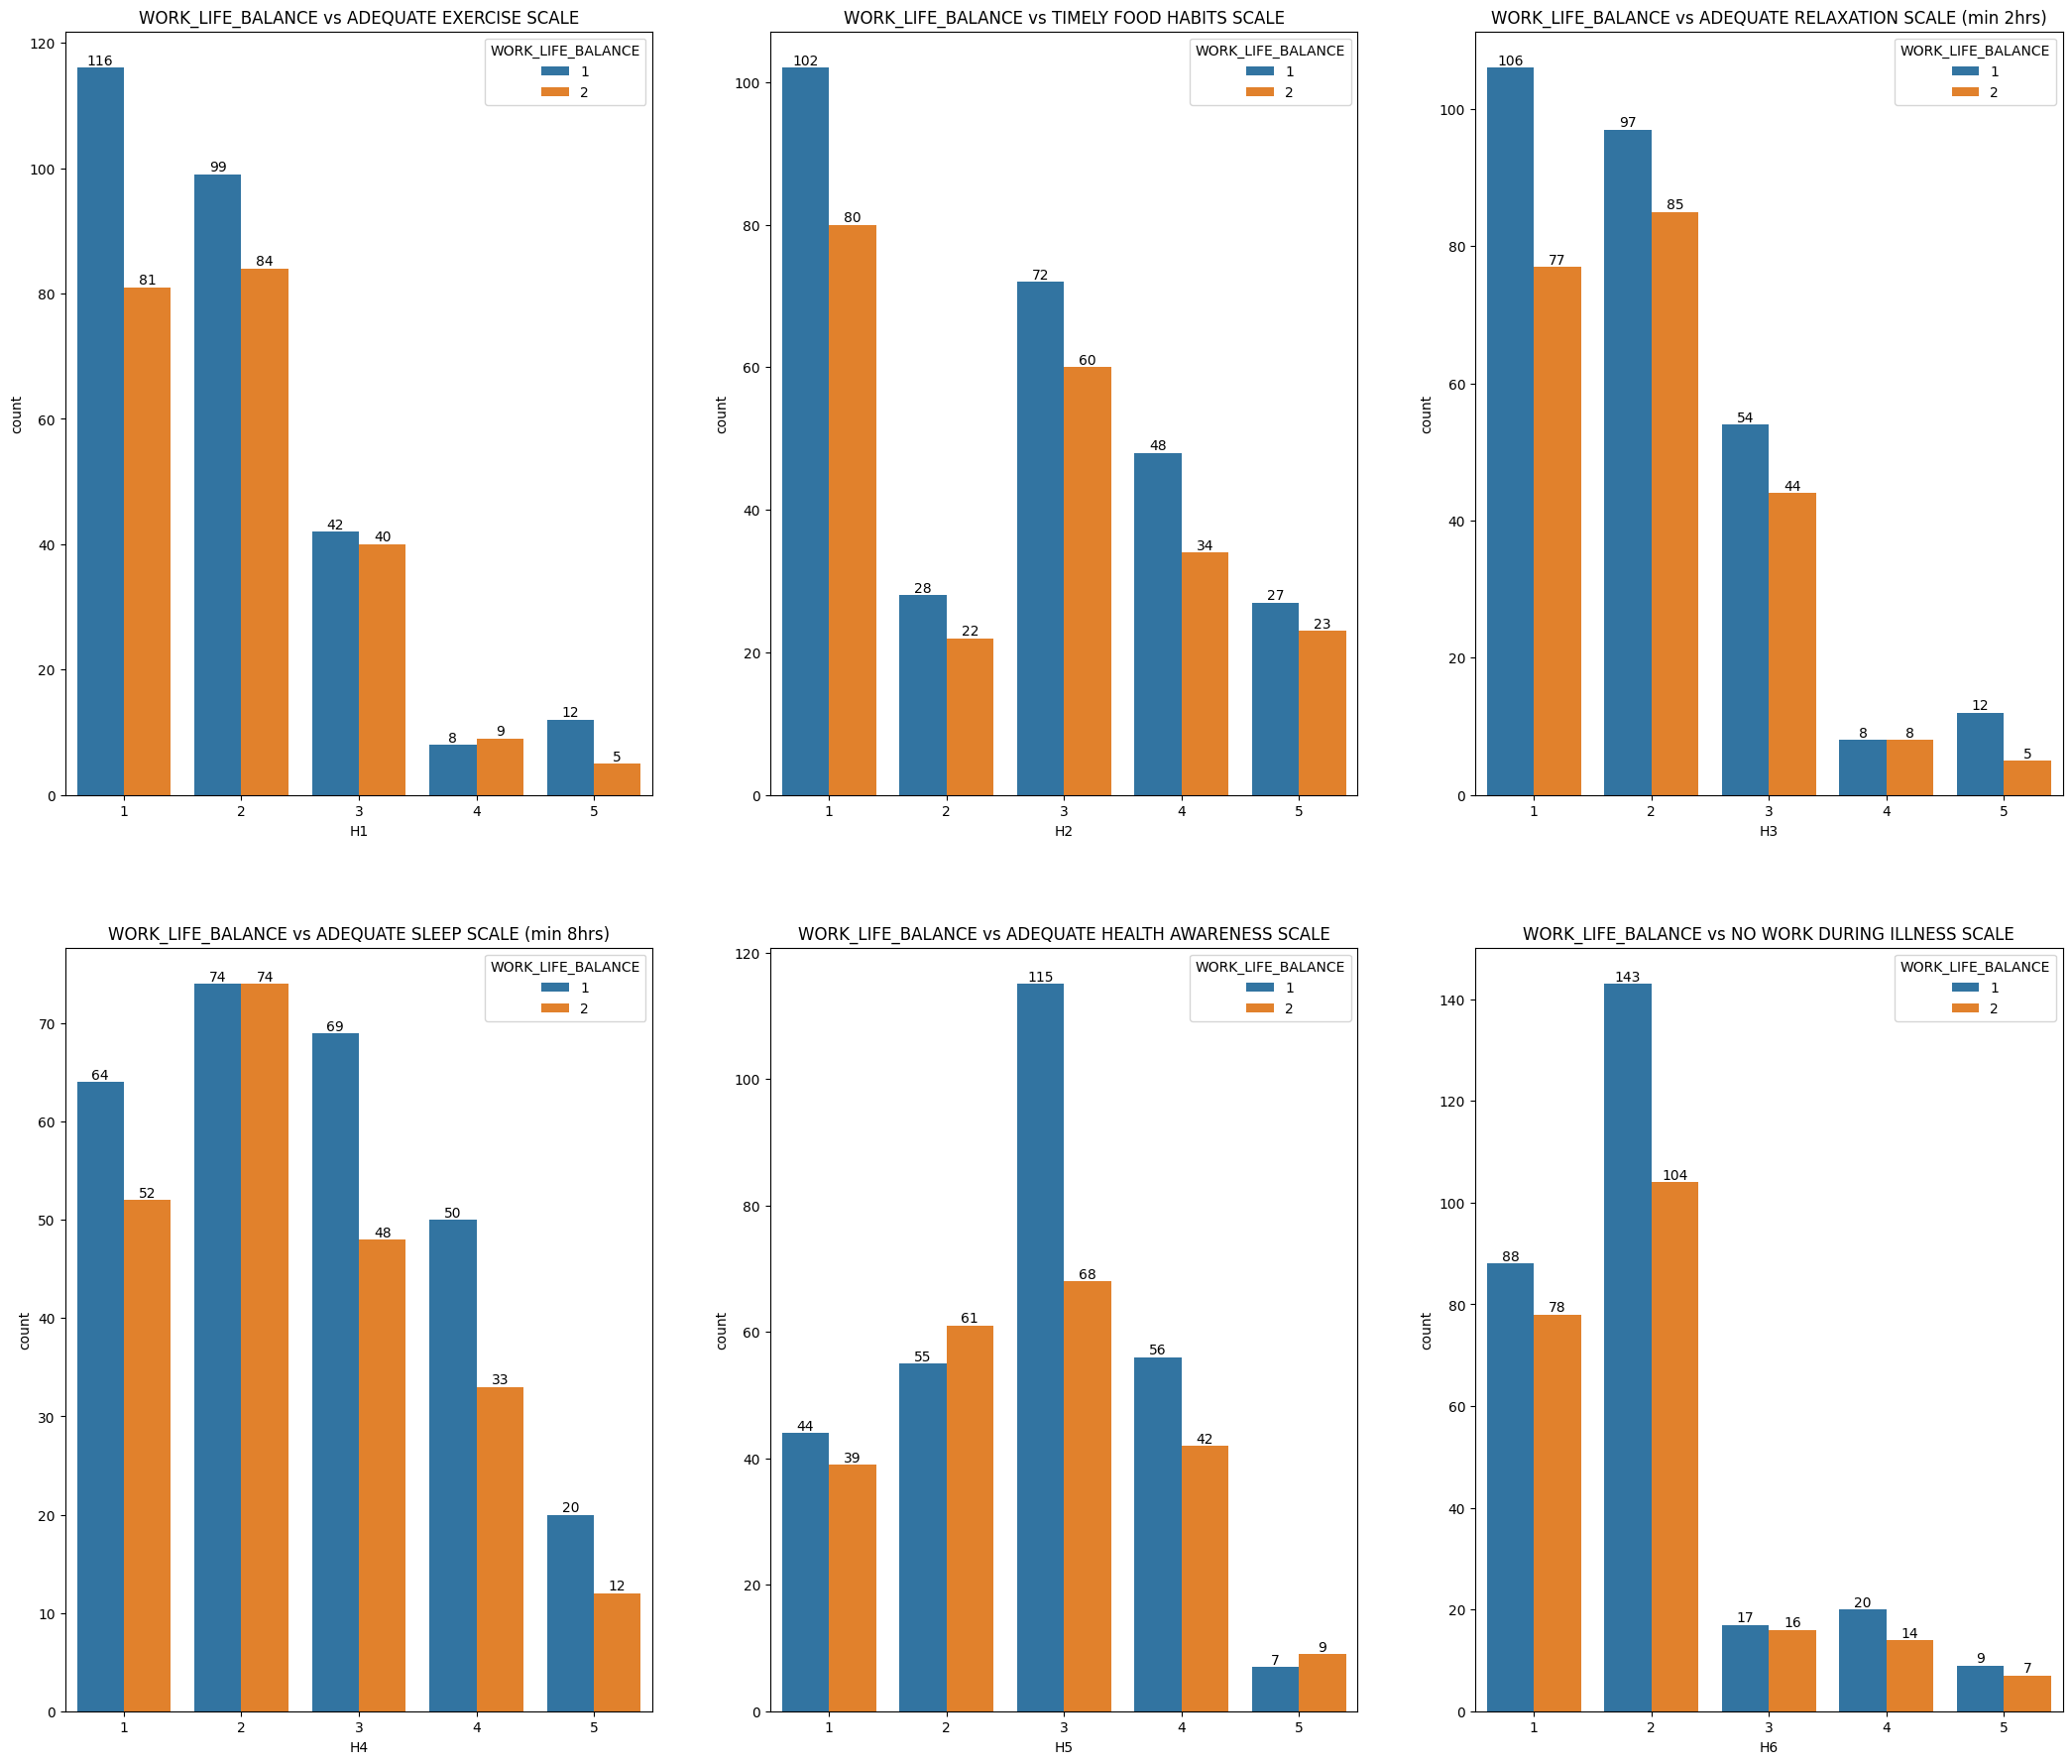

In [14]:
plt.figure(figsize=(26,22))
plt.subplot(231)

ax = sns.countplot(x=df_copy['H1'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('WORK_LIFE_BALANCE vs ADEQUATE EXERCISE SCALE')

plt.subplot(232)
ax = sns.countplot(x=df_copy['H2'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('WORK_LIFE_BALANCE vs TIMELY FOOD HABITS SCALE')

plt.subplot(233)
ax = sns.countplot(x=df_copy['H3'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('WORK_LIFE_BALANCE vs ADEQUATE RELAXATION SCALE (min 2hrs)')

plt.subplot(234)
ax = sns.countplot(x=df_copy['H4'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('WORK_LIFE_BALANCE vs ADEQUATE SLEEP SCALE (min 8hrs)')

plt.subplot(235)
ax = sns.countplot(x=df_copy['H5'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('WORK_LIFE_BALANCE vs ADEQUATE HEALTH AWARENESS SCALE')

plt.subplot(236)
ax = sns.countplot(x=df_copy['H6'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('WORK_LIFE_BALANCE vs NO WORK DURING ILLNESS SCALE')




Text(0.5, 1.0, 'EDUCATIONAL_QUALIFICATION vs WORK_LIFE_BALANCE')

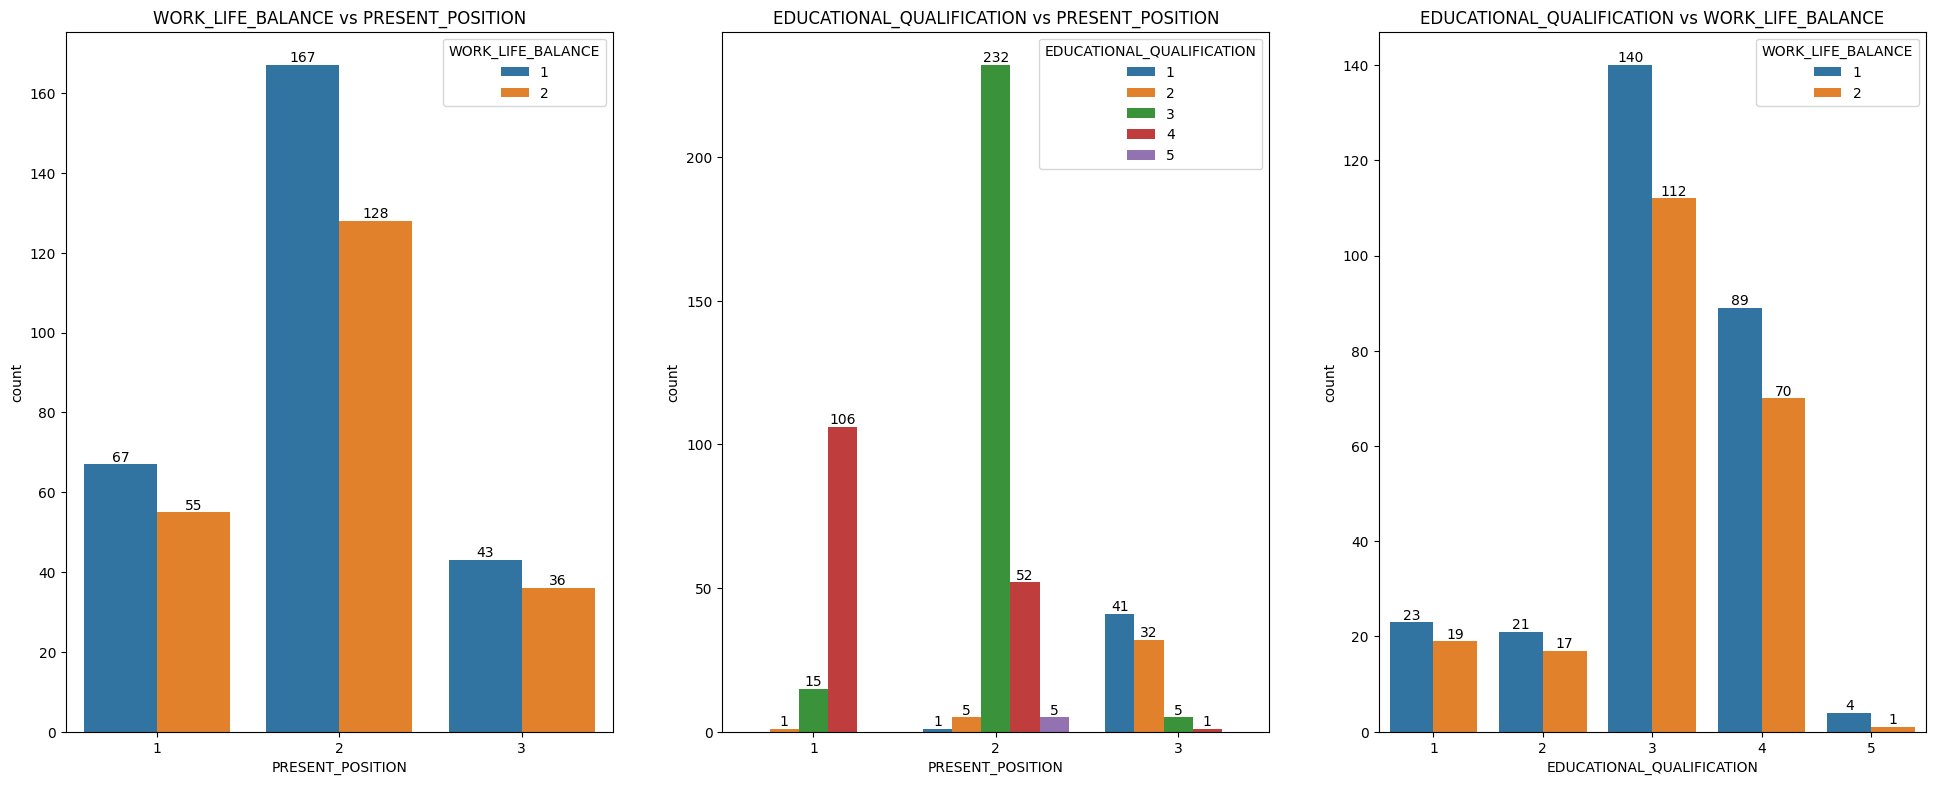

In [15]:
plt.figure(figsize=(24,20))
plt.subplot(231)
ax = sns.countplot(x=df_copy['PRESENT_POSITION'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('WORK_LIFE_BALANCE vs PRESENT_POSITION')


plt.subplot(232)
ax = sns.countplot(x=df_copy['PRESENT_POSITION'],hue=df_copy['EDUCATIONAL_QUALIFICATION'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('EDUCATIONAL_QUALIFICATION vs PRESENT_POSITION')

plt.subplot(233)
ax = sns.countplot(x=df_copy['EDUCATIONAL_QUALIFICATION'],hue=df_copy['WORK_LIFE_BALANCE'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('EDUCATIONAL_QUALIFICATION vs WORK_LIFE_BALANCE')


In [16]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [17]:
df_copy.head()

,NO OF RESPONDENTS,GENDER,AGE,RELIGION,MARITAL_STATUS,SPOUSE_JOB,SPOUSE_JOB_NATURE,ETHINCITY,NATURE_OF_FAMILY,EDUCATIONAL_QUALIFICATION,MONTHLY_INCOME,PRESENT_POSITION,EXPERIENCE,NATURE_OF_APPOINMENT,HOURS_SPENT_IN_BANK,NO_OF_EMPLOYEES,SATISFACTION,WORK_LIFE_BALANCE,SM1,SM2,SM3,SM4,SM5,SM6,SM7,SM8,SM9,SM10,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,FA10,FA11,FA12,FA13,SI1,SI2,SI3,SI4,SI5,SI6,SI7,SI8,H1,H2,H3,H4,H5,H6,H7,H8,WS1,WS2,WS3,WS4,WS5,WS6,WS7,WS8,WS9,WS10,WS11,WS12,WS13,WS14,WS15,WS16,WS17,WS18,WS19,WS20,WS21,WS22,WS23,WS24,WS25,WS26,WS27,WS28,WS29,PE1,PE2,PE3,PE4,IE1,IE2,IE3,IE4,IE5,IE6,IE7,IE8,IE9,IE10,IE11,IE12,IE13,WLB1,WLB2,WLB3,WLB4,WLB5,WLB6,WLB7,WLB8,WLB9,WLB10,WLB11,WLB12,WLB13
0,1,2,1,1,2,0,0,2,2,3,1,2,2,1,1,10,1,1,2,2,1,1,1,3,5,4,4,2,1,2,4,3,3,3,4,4,3,2,5,4,5,3,3,3,2,3,2,2,5,2,4,1,4,4,1,2,2,5,4,4,3,4,4,3,1,5,3,2,5,4,5,4,3,5,4,4,4,4,5,4,4,4,1,1,2,1,2,2,2,1,2,2,1,1,2,1,1,2,2,2,2,1,1,2,3,3,3,4,4,4,2,4,3,3,3,1
1,2,1,2,1,1,1,2,1,1,3,2,2,3,1,2,10,1,1,2,2,3,1,3,1,1,2,3,2,3,2,3,1,5,2,2,4,2,1,4,1,2,1,2,1,1,3,1,1,2,1,1,1,1,3,4,2,4,5,5,2,5,2,3,5,1,3,2,4,5,2,4,3,3,5,5,4,5,5,5,5,4,5,5,3,5,5,2,1,2,1,2,2,1,1,2,1,1,2,2,1,1,1,1,4,2,4,4,2,3,2,2,4,2,4,4,2
2,3,1,3,1,1,1,1,1,1,4,2,1,4,1,2,10,1,1,4,4,2,3,2,2,2,5,2,5,5,3,5,5,3,5,4,5,5,2,3,1,3,5,4,5,3,5,4,2,5,1,5,2,3,2,3,4,1,5,4,3,2,4,3,2,1,3,5,5,5,5,5,3,2,5,5,5,5,3,5,5,5,4,5,2,3,1,2,2,2,1,1,2,2,1,2,1,1,2,2,2,2,1,1,5,2,2,5,4,3,2,5,2,3,5,4,3
3,4,2,1,1,1,1,2,1,1,5,2,2,3,1,2,10,1,1,3,2,1,3,4,1,1,1,1,1,1,2,1,4,3,2,1,2,2,2,3,1,3,2,3,2,5,5,2,1,2,1,1,1,2,2,2,1,2,1,2,1,1,3,3,3,1,1,2,2,2,4,3,1,1,3,4,3,5,2,2,1,2,5,5,1,5,5,2,2,2,2,2,2,1,2,2,1,1,1,2,2,1,1,1,2,2,2,2,4,4,3,2,3,3,2,2,2
4,5,1,4,1,1,1,3,2,1,4,4,2,4,1,2,10,1,1,3,2,2,1,5,2,1,1,1,2,2,2,5,2,5,2,5,1,5,1,5,3,1,3,3,3,3,5,1,1,1,3,1,1,1,1,1,1,4,4,4,5,3,2,2,2,1,1,3,3,5,5,3,4,4,5,4,4,4,3,5,5,3,4,5,1,5,5,2,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,1,3,1,2,5,4,4,2,3,4,2,4,5,2


In [18]:
df_health = df_copy[['MONTHLY_INCOME','HOURS_SPENT_IN_BANK', 'SATISFACTION', 'H1', 'H2','H3','H4','H5','H6','H7','H8', 'WORK_LIFE_BALANCE']].copy()

In [19]:
df_health.head()

,MONTHLY_INCOME,HOURS_SPENT_IN_BANK,SATISFACTION,H1,H2,H3,H4,H5,H6,H7,H8,WORK_LIFE_BALANCE
0,1,1,1,2,4,1,4,4,1,2,2,1
1,2,2,1,1,1,1,1,3,4,2,4,1
2,2,2,1,1,5,2,3,2,3,4,1,1
3,2,2,1,1,1,1,2,2,2,1,2,1
4,4,2,1,3,1,1,1,1,1,1,4,1


In [20]:
x=df_health.drop('WORK_LIFE_BALANCE', axis=1)
x

,MONTHLY_INCOME,HOURS_SPENT_IN_BANK,SATISFACTION,H1,H2,H3,H4,H5,H6,H7,H8
0,1,1,1,2,4,1,4,4,1,2,2
1,2,2,1,1,1,1,1,3,4,2,4
2,2,2,1,1,5,2,3,2,3,4,1
3,2,2,1,1,1,1,2,2,2,1,2
4,4,2,1,3,1,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
491,2,1,1,2,2,2,2,2,2,2,3
492,4,3,2,2,4,1,3,3,2,1,4
493,2,1,1,2,3,2,2,2,2,3,2
494,1,2,2,2,3,2,4,3,2,3,2


In [21]:
y=df_health['WORK_LIFE_BALANCE']

In [22]:
y = y.map({1:0, 2:1})

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [24]:
standard_scaler = StandardScaler()
standard_scaler_fit=standard_scaler.fit(x_train)
x_train=standard_scaler_fit.transform(x_train)
x_test=standard_scaler_fit.transform(x_test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [25]:
model_rf = RandomForestClassifier(max_depth=5, n_estimators=240, criterion='entropy')

# Creating the model on Training Data
model_rf_fit=model_rf.fit(x_train,y_train)
model_rf_pred=model_rf_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_rf_pred))
print(metrics.confusion_matrix(y_test, model_rf_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_rf_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        54
           1       0.81      0.74      0.77        46

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

[[46  8]
 [12 34]]
Accuracy of the model on Testing Sample Data: 0.8


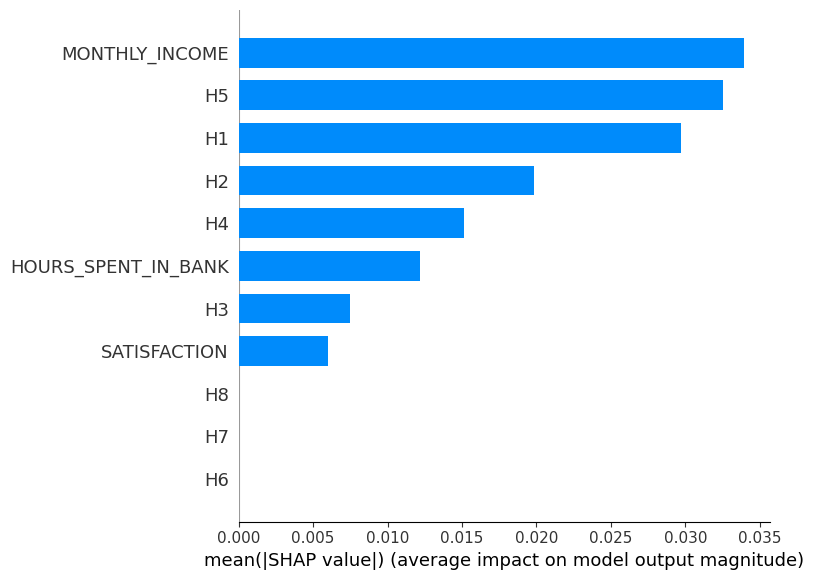

In [144]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values[1], x, plot_type="bar")

In [145]:
df_copy.head()

,NO OF RESPONDENTS,GENDER,AGE,RELIGION,MARITAL_STATUS,SPOUSE_JOB,SPOUSE_JOB_NATURE,ETHINCITY,NATURE_OF_FAMILY,EDUCATIONAL_QUALIFICATION,MONTHLY_INCOME,PRESENT_POSITION,EXPERIENCE,NATURE_OF_APPOINMENT,HOURS_SPENT_IN_BANK,NO_OF_EMPLOYEES,SATISFACTION,WORK_LIFE_BALANCE,SM1,SM2,SM3,SM4,SM5,SM6,SM7,SM8,SM9,SM10,FA1,FA2,FA3,FA4,FA5,FA6,FA7,FA8,FA9,FA10,FA11,FA12,FA13,SI1,SI2,SI3,SI4,SI5,SI6,SI7,SI8,H1,H2,H3,H4,H5,H6,H7,H8,WS1,WS2,WS3,WS4,WS5,WS6,WS7,WS8,WS9,WS10,WS11,WS12,WS13,WS14,WS15,WS16,WS17,WS18,WS19,WS20,WS21,WS22,WS23,WS24,WS25,WS26,WS27,WS28,WS29,PE1,PE2,PE3,PE4,IE1,IE2,IE3,IE4,IE5,IE6,IE7,IE8,IE9,IE10,IE11,IE12,IE13,WLB1,WLB2,WLB3,WLB4,WLB5,WLB6,WLB7,WLB8,WLB9,WLB10,WLB11,WLB12,WLB13
0,1,2,1,1,2,0,0,2,2,3,1,2,2,1,1,10,1,1,2,2,1,1,1,3,5,4,4,2,1,2,4,3,3,3,4,4,3,2,5,4,5,3,3,3,2,3,2,2,5,2,4,1,4,4,1,2,2,5,4,4,3,4,4,3,1,5,3,2,5,4,5,4,3,5,4,4,4,4,5,4,4,4,1,1,2,1,2,2,2,1,2,2,1,1,2,1,1,2,2,2,2,1,1,2,3,3,3,4,4,4,2,4,3,3,3,1
1,2,1,2,1,1,1,2,1,1,3,2,2,3,1,2,10,1,1,2,2,3,1,3,1,1,2,3,2,3,2,3,1,5,2,2,4,2,1,4,1,2,1,2,1,1,3,1,1,2,1,1,1,1,3,4,2,4,5,5,2,5,2,3,5,1,3,2,4,5,2,4,3,3,5,5,4,5,5,5,5,4,5,5,3,5,5,2,1,2,1,2,2,1,1,2,1,1,2,2,1,1,1,1,4,2,4,4,2,3,2,2,4,2,4,4,2
2,3,1,3,1,1,1,1,1,1,4,2,1,4,1,2,10,1,1,4,4,2,3,2,2,2,5,2,5,5,3,5,5,3,5,4,5,5,2,3,1,3,5,4,5,3,5,4,2,5,1,5,2,3,2,3,4,1,5,4,3,2,4,3,2,1,3,5,5,5,5,5,3,2,5,5,5,5,3,5,5,5,4,5,2,3,1,2,2,2,1,1,2,2,1,2,1,1,2,2,2,2,1,1,5,2,2,5,4,3,2,5,2,3,5,4,3
3,4,2,1,1,1,1,2,1,1,5,2,2,3,1,2,10,1,1,3,2,1,3,4,1,1,1,1,1,1,2,1,4,3,2,1,2,2,2,3,1,3,2,3,2,5,5,2,1,2,1,1,1,2,2,2,1,2,1,2,1,1,3,3,3,1,1,2,2,2,4,3,1,1,3,4,3,5,2,2,1,2,5,5,1,5,5,2,2,2,2,2,2,1,2,2,1,1,1,2,2,1,1,1,2,2,2,2,4,4,3,2,3,3,2,2,2
4,5,1,4,1,1,1,3,2,1,4,4,2,4,1,2,10,1,1,3,2,2,1,5,2,1,1,1,2,2,2,5,2,5,2,5,1,5,1,5,3,1,3,3,3,3,5,1,1,1,3,1,1,1,1,1,1,4,4,4,5,3,2,2,2,1,1,3,3,5,5,3,4,4,5,4,4,4,3,5,5,3,4,5,1,5,5,2,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,1,3,1,2,5,4,4,2,3,4,2,4,5,2


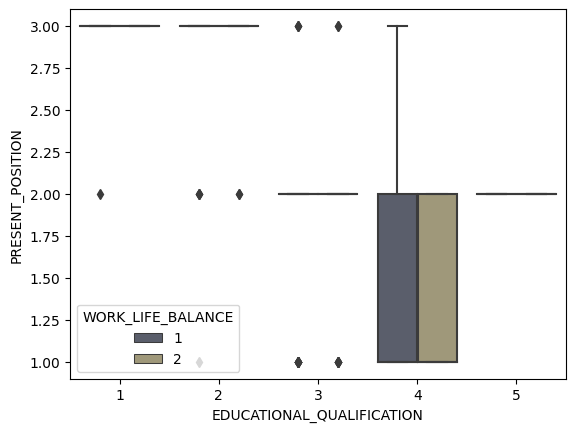

In [28]:
ax = sns.boxplot(x=df_copy['EDUCATIONAL_QUALIFICATION'],y=df_copy['PRESENT_POSITION'],hue=df_copy['WORK_LIFE_BALANCE'], palette='cividis')

In [ ]:
plt.figure(figsize=(5,10))
ax = sns.relplot(data = df_copy,y='MonthlyIncome', x='JobRole', hue='Attrition', col='Gender')
rotation = 90
for i , ax in enumerate (ax.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)

plt.show()